In [38]:
# import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [2]:
# load data 
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
# Examine data # the aim is to buil model to predict the survived 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [4]:
# clean data 
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# drop the column that I don't need 
df = df.drop(['class', 'alone','fare','who','adult_male','deck','embark_town', 'alive' ,'embarked' ] ,axis = 1)
df

,survived,pclass,sex,age,sibsp,parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
886,0,2,male,27.0,0,0
887,1,1,female,19.0,0,0
888,0,3,female,NaN,1,2
889,1,1,male,26.0,0,0


In [6]:
# null data 
df.isnull().sum()  # just age have null data 

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
dtype: int64

In [7]:
# fill age data with mean 
age_mean = df['age'].mean()
df['age'] = df['age'].fillna(age_mean)

In [8]:
df.isnull().sum() # now there isn't any null value 

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
dtype: int64

In [9]:
#transform categorical data to numerical
# feamle == 1 # male == 0 
df['sex'].replace(['male','female'],[0,1] , inplace = True)

In [10]:
# split data to training and split data 
training , test = train_test_split (
df , train_size = 0.8 , 
     test_size = 0.2 , 
     random_state = 42 #so that regardless of how many times I run the code I will have the "exact" points
)

In [11]:
training.head()

,survived,pclass,sex,age,sibsp,parch
331,0,1,0,45.5,0,0
733,0,2,0,23.0,0,0
382,0,3,0,32.0,0,0
704,0,3,0,26.0,1,0
813,0,3,1,6.0,4,2


In [12]:
test.head()

,survived,pclass,sex,age,sibsp,parch
709,1,3,0,29.699118,1,1
439,0,2,0,31.000000,0,0
840,0,3,0,20.000000,0,0
720,1,2,1,6.000000,0,1
39,1,3,1,14.000000,1,0


In [13]:
# spilting training data into training and validation 
# choose the target # survived 
# feature set -- sex , age , pclass
feature = training.drop(['survived','sibsp','parch'] , axis = 1 ) # feature 
target = 'survived'# traget

In [14]:
  
x_train,x_val,y_train,y_val, = train_test_split (feature,training[target],train_size = 0.8 , 
                                                test_size = 0.2 , random_state = 42)

In [15]:
x_train.head()

,pclass,sex,age
517,3,0,29.699118
792,3,1,29.699118
472,2,1,33.000000
483,3,1,63.000000
9,2,1,14.000000


In [57]:
# create a model 
# training step
lr = LogisticRegression()
lr.fit(x_train, y_train) # fit the model

LogisticRegression()

In [58]:
#testing step 
lr.score(x_val, y_val) # the accurecy for the model 

0.8041958041958042

In [59]:
#predictions 
pre = lr.predict(x_val) # just add the feature 
pre

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

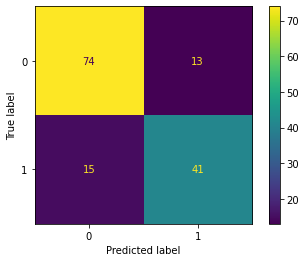

In [60]:
plot_confusion_matrix(lr, x_val, y_val);

In [61]:
#  Look at classification report
print(classification_report(y_val, pre))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        87
           1       0.76      0.73      0.75        56

    accuracy                           0.80       143
   macro avg       0.80      0.79      0.79       143
weighted avg       0.80      0.80      0.80       143



In [62]:
# validation 
# 6 folder 
acc = cross_val_score(lr, x_val, y_val, cv=10)

In [63]:
# mean of validation 
acc.mean() 

0.8176190476190477

In [64]:
#coeffecients
lr.coef_

array([[-1.05728268,  2.38092276, -0.02455858]])

In [65]:
lr.intercept_ # b

array([1.70299639])

In [86]:
def calc_cost(y_true, y_pre):
    
    "Calculate Cost Functions and print output"
    
    result = {}
    
    mse = mean_squared_error(y_true, y_pre)
    mae = mean_absolute_error(y_true, y_pre)
    rmse = mean_squared_error(y_true, y_pre, squared=False)
    
    ls = [mse, mae, rmse]
    ls2 = ["MSE", "MAE", "RMSE"]
    
    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result[ls2[x]] = ls[x]
    
    return result

In [89]:
print("Model")
preds = lr.predict(x_val)
res6 = calc_cost(y_val, preds)
print("Logistic Regression ")
calc_cost(y_val, lr.predict(x_val));  # need to review the cost function 

Model
MSE: 0.1958041958041958
MAE: 0.1958041958041958
RMSE: 0.4424976788687098
Logistic Regression 
MSE: 0.1958041958041958
MAE: 0.1958041958041958
RMSE: 0.4424976788687098


In [34]:
# saved the model 
import joblib

In [35]:
joblib.dump(lr,f"model")

['model']